# Diseño de filtros IIR


Diseñemos un filtro pasabajos IIR basado en un filtro análogo con respuesta tipo Chebychev. En este ejemplo, queremos que el filtro tenga frecuencia de corte $\omega_p = 0.2\pi$, orden $N=13$, y ripple en la banda de paso de $\delta = 0.01$ [db].

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy.signal import iirfilter, cheby1, tf2zpk, dimpulse, freqz
import zplane
%matplotlib inline

In [2]:
N = 13
rp = 0.01
Wn = 0.2 
[b, a] = cheby1(N, rp, Wn)

Grafiquemos el diagrama de polos y ceros

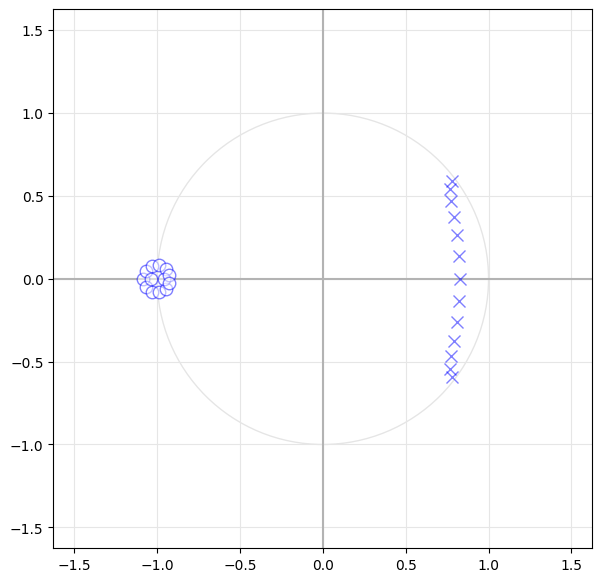

In [10]:
z, p, k = tf2zpk(b, a)
plt.figure(figsize=(7, 7))
zplane.zplane(z, p)

Respuesta a impulso. Notar que la respuesta a impulso no es simétrica, por lo que podemos concluir que la fase del filtro no es lineal.

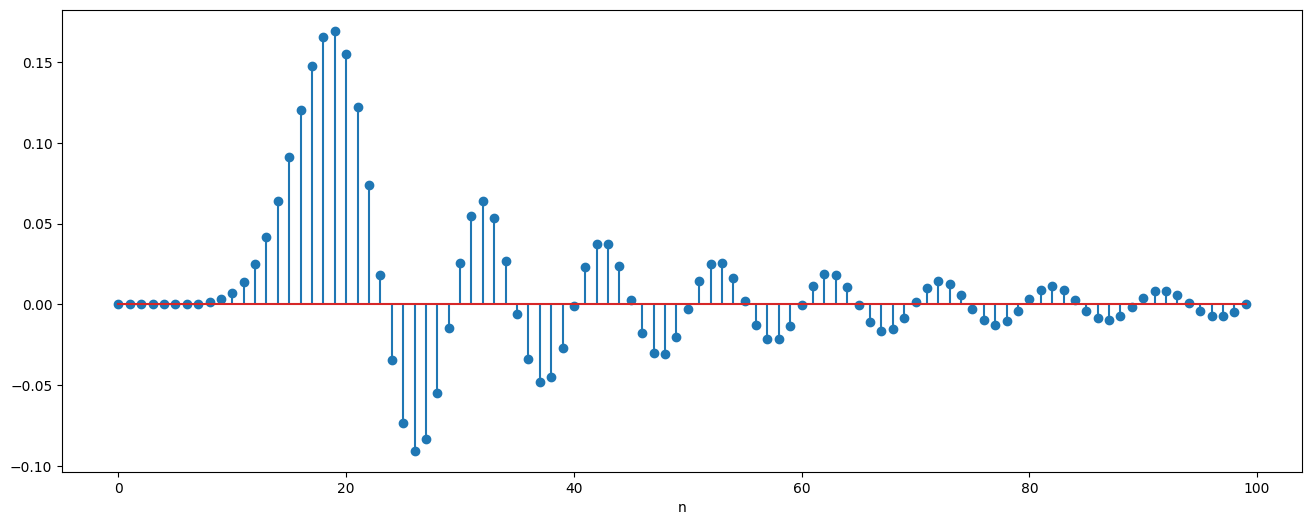

In [7]:
n, y = dimpulse((b, a, 1))
plt.figure(figsize=(16,6))
plt.stem(n, y[0])
plt.xlabel('n');

Respuesta en frecuencia

Text(0, 0.5, '$<H(\\omega) [rad]$')

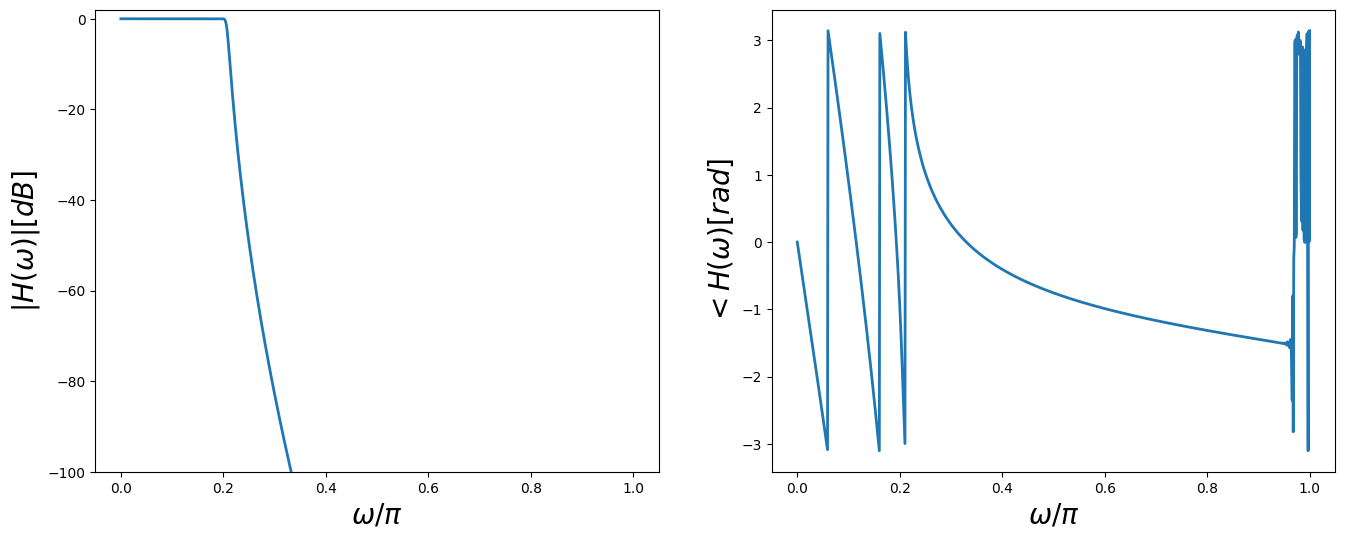

In [8]:
w = np.linspace(0, pi, 1000)
_, H = freqz(b, a, w)
_, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].plot(w/pi, 20*np.log10(np.abs(H)), lw=2)     
axs[0].set_xlabel('$\omega / \pi$', fontsize=20)
axs[0].set_ylabel('$|H(\omega)| [dB]$', fontsize=20)
axs[0].set_ylim(-100, 2)
axs[1].plot(w/pi, np.angle(H), lw=2)     
axs[1].set_xlabel('$\omega / \pi$', fontsize=20)
axs[1].set_ylabel('$<H(\omega) [rad]$', fontsize=20)

Zoom en la banda de paso

(0.0, 0.25)

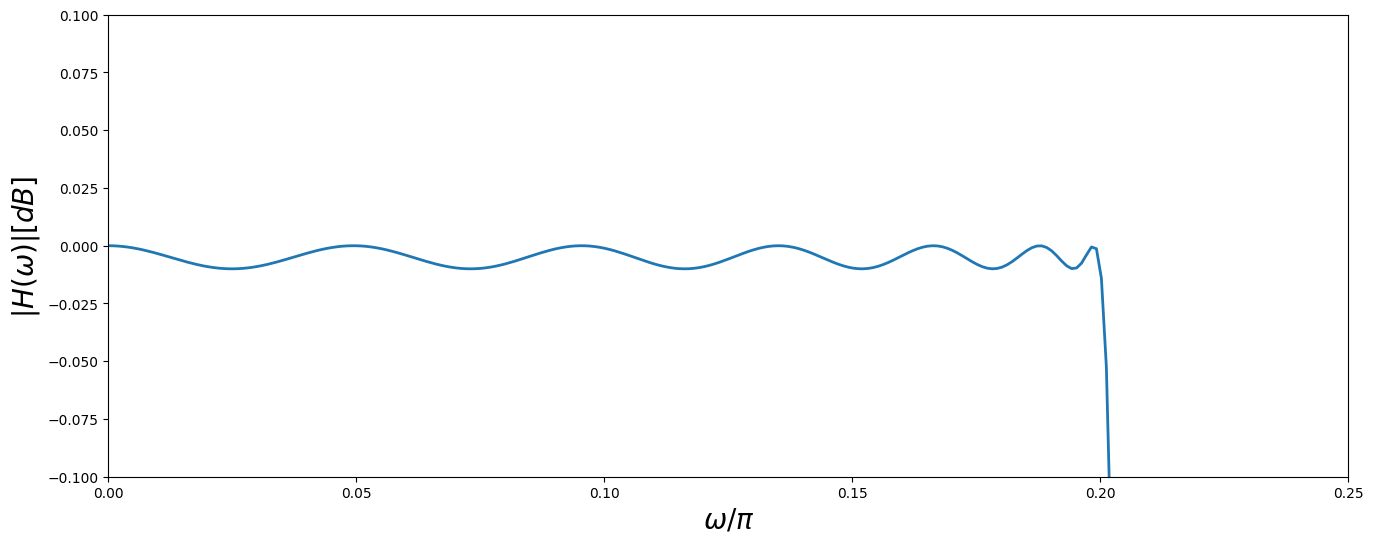

In [9]:
plt.figure(figsize=(16,6))
plt.plot(w/pi, 20*np.log10(np.abs(H)), lw=2)     
plt.xlabel('$\omega / \pi$', fontsize=20)
plt.ylabel('$|H(\omega)| [dB]$', fontsize=20)
plt.ylim(-0.1, 0.1)
plt.xlim(0, 0.25)